In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.decomposition import PCA

import seaborn as sb
from scipy.stats import beta, lognorm

# PCA Analysis

In [2]:
#load data

mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist
X_train.shape

(60000, 28, 28)

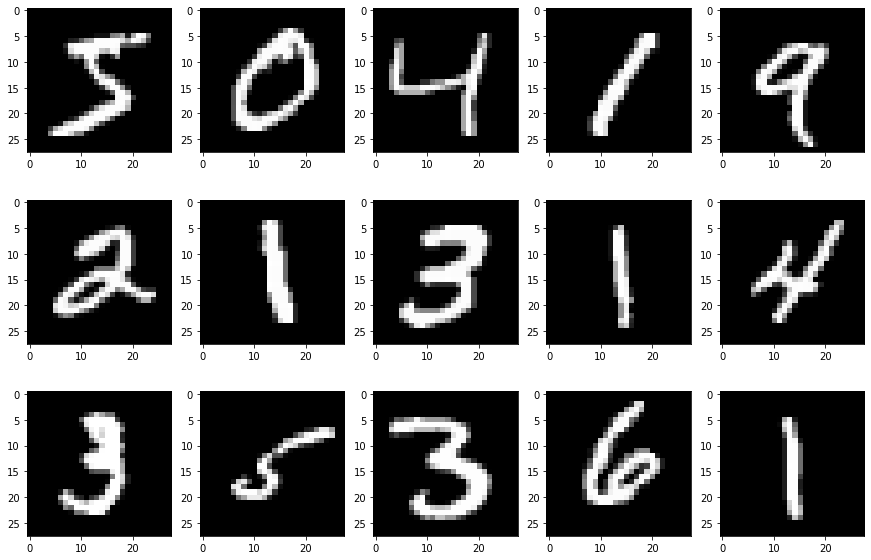

In [3]:
# visualize input 

plt.figure(figsize=(15,10))
for i in range(3*5):
    plt.subplot(3,5,i+1)
    plt.imshow(X_train[i,:,:], cmap='gray')

In [4]:
#reshape data since PCA expects a vector

X_train = X_train.reshape(60000, -1)
X_train.shape

(60000, 784)

In [42]:
# perform PCA (without dimensionality reduction)
pca = PCA()
pca_transformed = pca.fit_transform(X_train)

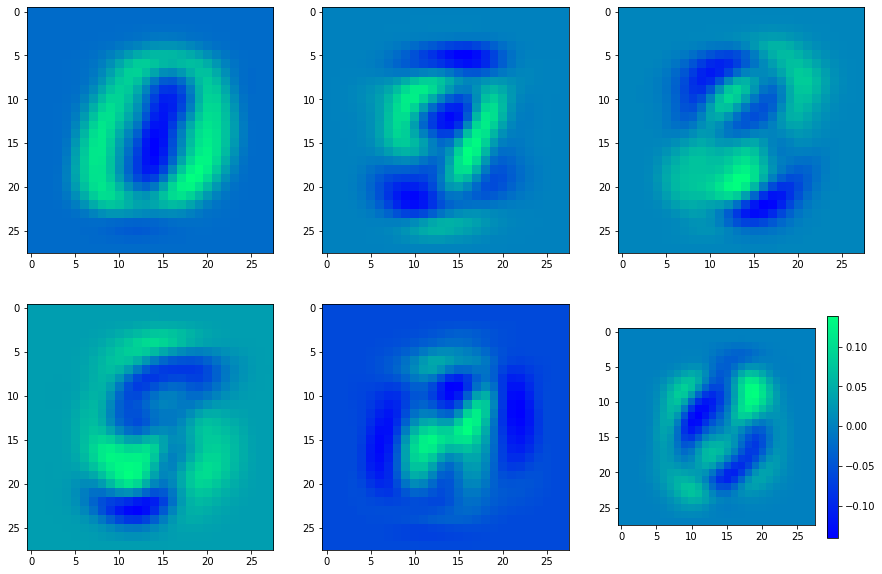

In [34]:
#visualize the six principal components with the most variance

plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    #plt.contourf(pca.components_[i,:].reshape(28, 28), cmap='winter')
    plt.imshow(pca.components_[i,:].reshape(28, 28), cmap='winter')

plt.colorbar(shrink=0.9)

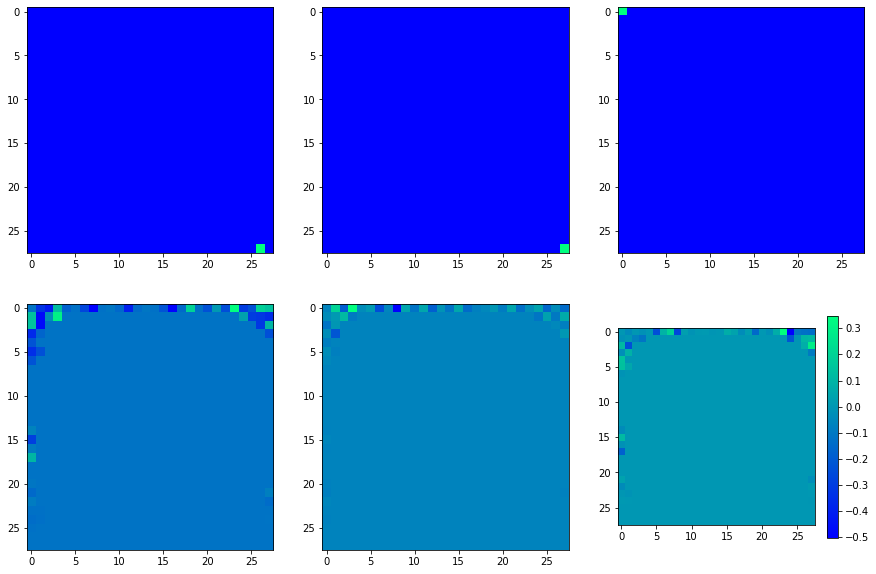

In [35]:
#visualize the six principal components with the least variance

plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    #plt.contourf(pca.components_[i-6,:].reshape(28, 28), cmap='winter')
    plt.imshow(pca.components_[i-6,:].reshape(28, 28), cmap='winter')
    
plt.colorbar(shrink=0.9)

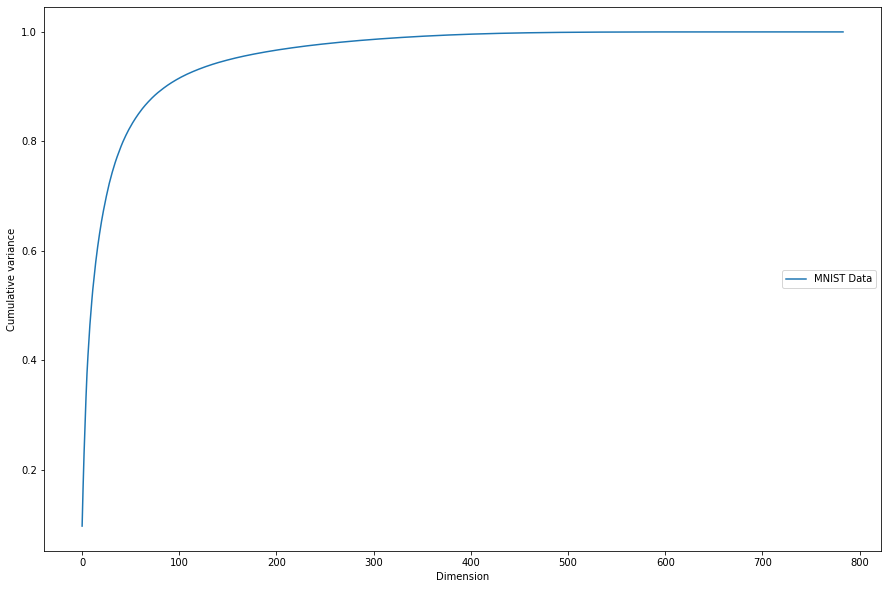

In [94]:
# this plot allows you to define, how many dimensions you need, to provide you with the required variance
csum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 10))
plt.plot(np.arange(0, 784), csum, label='MNIST Data')
plt.xlabel('Dimension')
plt.ylabel('Cumulative variance')
plt.legend(loc='right')

In [125]:
# 86 pixels can explain 90% of variance
# 153 pixels can explain 95% of variance
# 330 pixels (about half of the data) can explain 99% of variance,
# i.e., reduce the size of the input by half an loose nothing

sum(csum<=0.9), sum(csum<=0.95), sum(csum<=0.99)

(86, 153, 330)

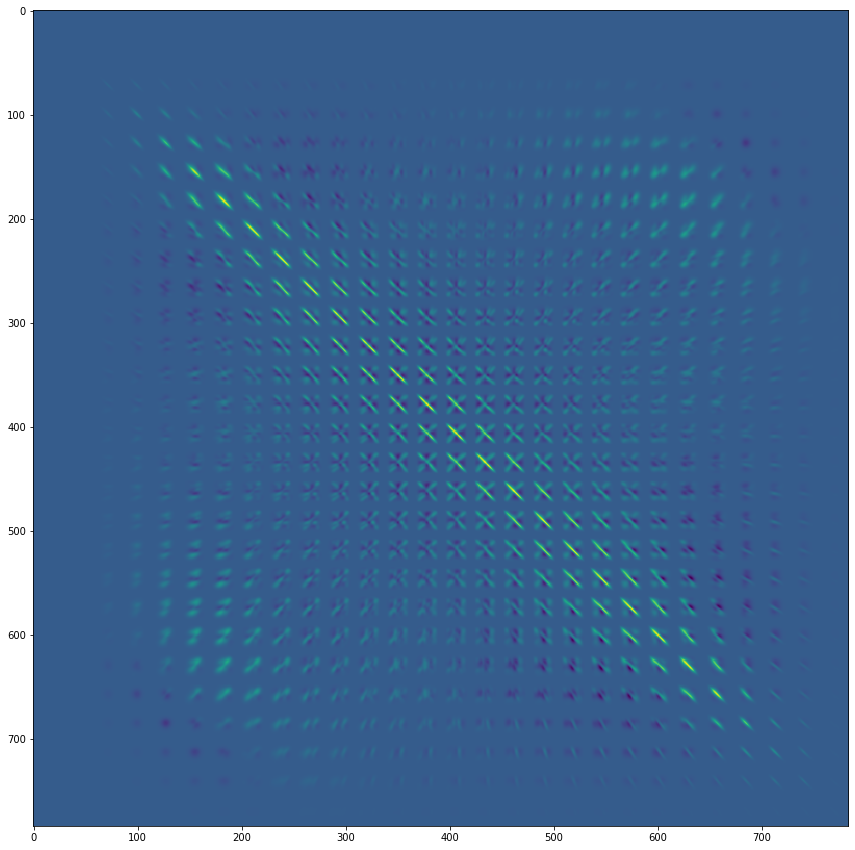

In [126]:
plt.figure(figsize=(15, 15))
plt.imshow(pca.get_covariance())

In [136]:
# these isles correspond to the data with variance (handwritten digits)
# the blank spots are correlations with the empty space

sum((pca.get_covariance()>0.01).ravel())/ (784*784)

0.3396550265514369

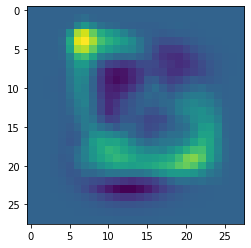

In [80]:
plt.imshow(pca.get_covariance()[90].reshape(28, 28))

# Considering only few images

In [39]:
X_train_mini = StandardScaler().fit_transform(X_train[:6].reshape(6,-1))
X_train_mini.shape

(6, 784)

In [40]:
pca = PCA(n_components=6)
mini_transformed = pca.fit_transform(X_train_mini)

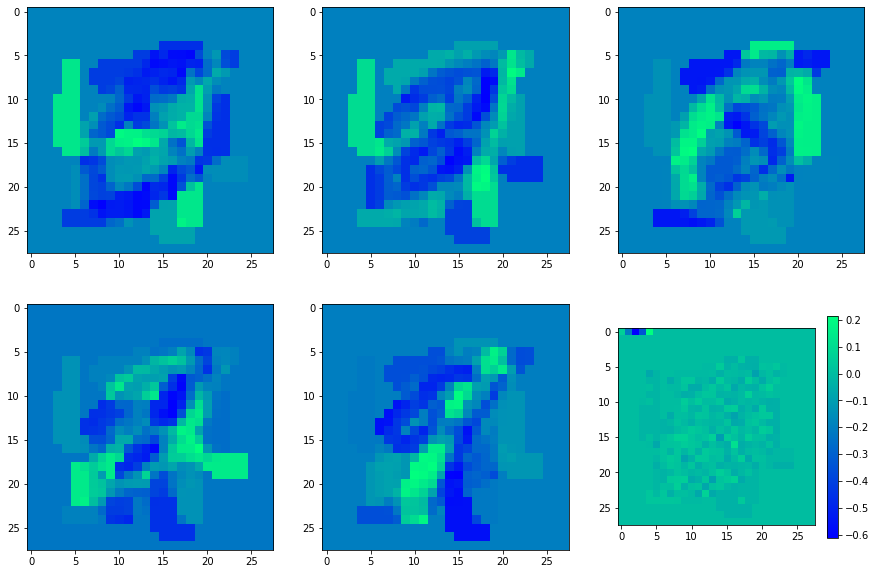

In [41]:
plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    #plt.contourf(pca.components_[i,:].reshape(28, 28), cmap='winter')
    plt.imshow(pca.components_[i,:].reshape(28, 28), cmap='winter')

plt.colorbar(shrink=0.9)

# Dimensionality reduction

In [145]:
# from above, we learned that about 153 dimensions are a good trade-off between variance and data size
# thus, each number should have a pixel width of 10 and height of 15 pixels (simplified, on average, 
# as we might cut out holes in numbers like 0, 3, 5, 8

In [146]:
pca_red = PCA(n_components=153)

In [158]:
pca_red_transformed = pca_red.fit_transform(X_train)
pca_red_transformed.shape

(60000, 153)

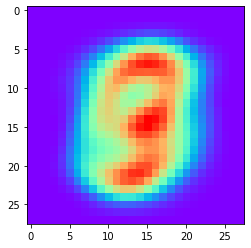

In [148]:
plt.imshow(pca_red.mean_.reshape(28, 28), cmap='rainbow')

In [162]:
# re - transform

pca_red_recovered = pca_red.inverse_transform(pca_red_transformed)
pca_red_recovered.shape

(60000, 784)

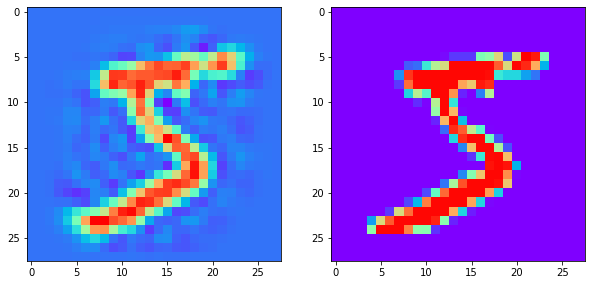

In [164]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(pca_red_recovered[0].reshape(28, 28), cmap='rainbow')
plt.subplot(1,2,2)
plt.imshow(X_train[0].reshape(28,28), cmap='rainbow')

# Likelihood scores

In [166]:
scores = pca_red.score_samples(X_train)

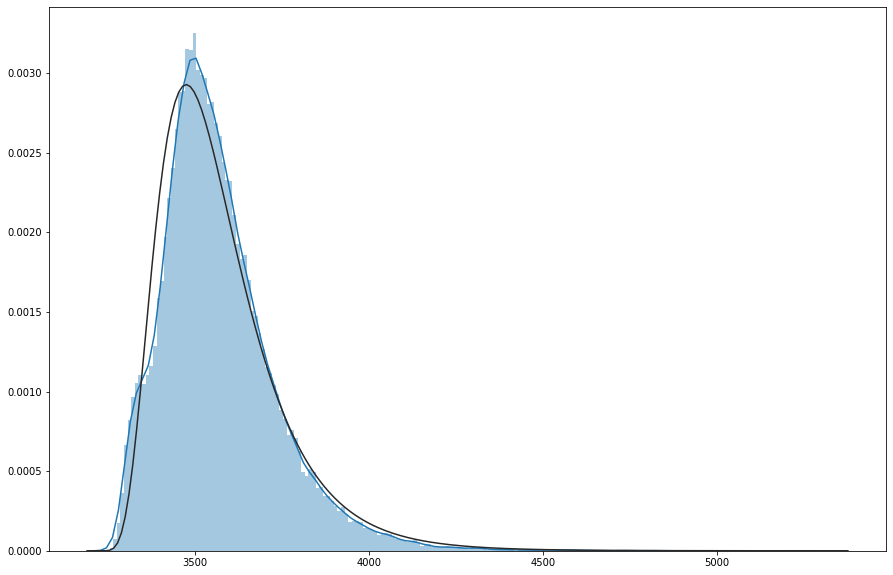

In [199]:
# the likelihoods have a bump at lower scores, and are skewed
# what does that mean? let's have a look

plt.figure(figsize=(15, 10))
sb.distplot(scores*-1, fit=lognorm, bins=200)

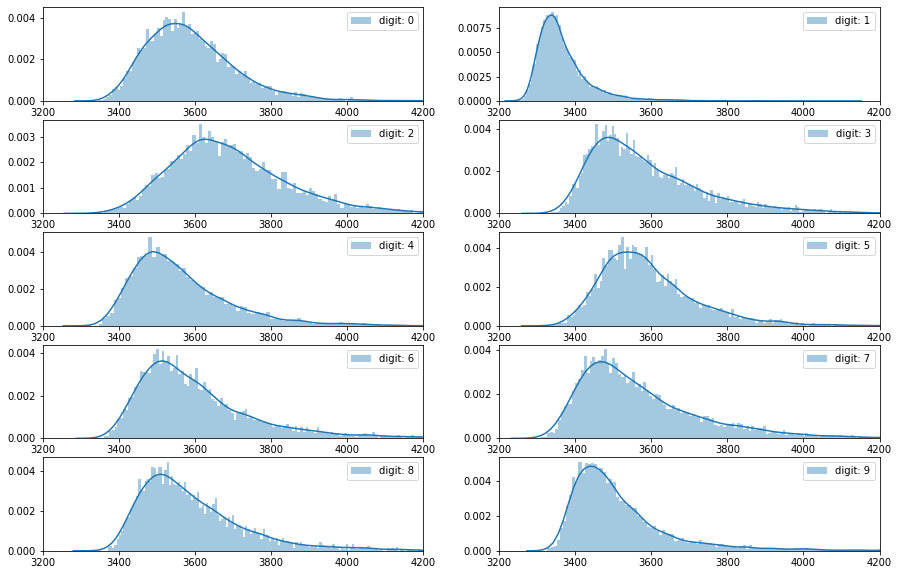

In [214]:
# samples log-likelihood can be used for pre-categorization
# e.g., digit 1, seems to have a lower likelihood score than digit 3 (on average)

plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    scores = pca_red.score_samples(X_train[y_train==i])
    sb.distplot(scores*-1, bins=200, label='digit: {}'.format(i))
    plt.xlim([3200, 4200])
    plt.legend()
    #plt.imshow(X_train[i,:,:], cmap='gray')

In [215]:
# to be continued

# Extra - calculate eigenvalues and vectors

In [ ]:
# if you would like to wait quite a while, try this cell

centered_matrix = X_train - X_train.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov)

In [ ]:
sorted(eigvals/sum(eigvals))

In [ ]:
sorted(list(zip(eigvals, eigvecs)), key=lambda x: x[0], reverse=True)

In [ ]:
sum(eigvecs**2)